In [99]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Input, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Reshape, Conv2DTranspose, UpSampling2D
from tensorflow.python.keras.optimizer_v2.adam import Adam
from keras.layers.merge import concatenate

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import time

import seaborn as sns

sns.set_theme(font_scale=1.7, style='whitegrid')

In [100]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [101]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [102]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [103]:
def spawn_NN(dim):
    NN = Sequential()
    NN.add(Dense(400,input_shape=(dim*dim,), activation='relu'))
    NN.add(Dense(100, activation='relu'))
    NN.add(Dropout(0.5))
    NN.add(Dense(num_classes, activation='softmax'))
    NN.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adadelta(), metrics=['acc'])
    return NN

In [104]:
myNN = spawn_NN(28)

In [105]:
hist_Adad = myNN.fit(X_train, Y_train, batch_size=24, epochs=15, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/15
2500/2500 [==============================] - 10s 4ms/step - loss: 2.2631 - acc: 0.1664 - val_loss: 2.0914 - val_acc: 0.3541
Epoch 2/15
2500/2500 [==============================] - 9s 4ms/step - loss: 2.0482 - acc: 0.3162 - val_loss: 1.8893 - val_acc: 0.5733
Epoch 3/15
2500/2500 [==============================] - 9s 4ms/step - loss: 1.8644 - acc: 0.4406 - val_loss: 1.6942 - val_acc: 0.6850
Epoch 4/15
2500/2500 [==============================] - 9s 4ms/step - loss: 1.6902 - acc: 0.5304 - val_loss: 1.5076 - val_acc: 0.7397
Epoch 5/15
2500/2500 [==============================] - 9s 4ms/step - loss: 1.5346 - acc: 0.5857 - val_loss: 1.3404 - val_acc: 0.7740
Epoch 6/15
2500/2500 [==============================] - 9s 4ms/step - loss: 1.3993 - acc: 0.6300 - val_loss: 1.1963 - val_acc: 0.7971
Epoch 7/15
2500/2500 [==============================] - 9s 4ms/step - loss: 1.2867 - acc: 0.6569 - val_loss: 1.0760 - val_acc: 0.8171
Epoch 8/15
2500/2500 [==============================] - 9s 4m

In [106]:
hist_SGD_L   = hist_SGD.history['loss']
hist_SGD_VL  = hist_SGD.history['val_loss']
hist_SGD_A   = hist_SGD.history['acc']
hist_SGD_VA  = hist_SGD.history['val_acc']

hist_Adam_L   = hist_Adam.history['loss']
hist_Adam_VL  = hist_Adam.history['val_loss']
hist_Adam_A   = hist_Adam.history['acc']
hist_Adam_VA  = hist_Adam.history['val_acc']

hist_Adad_L   = hist_Adad.history['loss']
hist_Adad_VL  = hist_Adad.history['val_loss']
hist_Adad_A   = hist_Adad.history['acc']
hist_Adad_VA  = hist_Adad.history['val_acc']

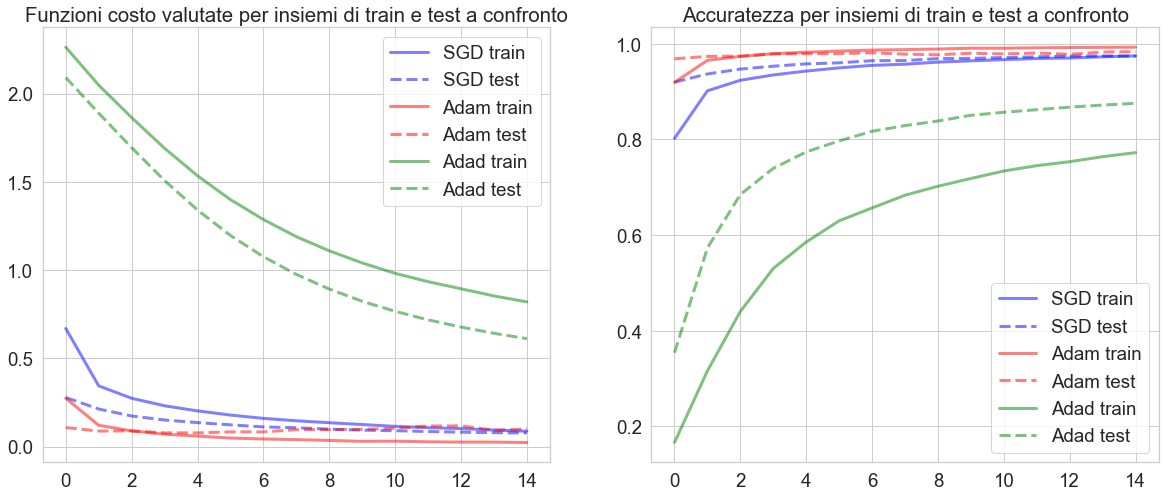

In [114]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Funzioni costo valutate per insiemi di train e test a confronto')
plt.plot(hist_SGD_L, color='blue', alpha=0.5, linewidth=3, linestyle='-', label='SGD train')
plt.plot(hist_SGD_VL, color='blue', alpha=0.5, linewidth=3, linestyle='--', label='SGD test')
plt.plot(hist_Adam_L, color='red', alpha=0.5, linewidth=3, linestyle='-', label='Adam train')
plt.plot(hist_Adam_VL, color='red', alpha=0.5, linewidth=3, linestyle='--', label='Adam test')
plt.plot(hist_Adad_L, color='green', alpha=0.5, linewidth=3, linestyle='-', label='Adad train')
plt.plot(hist_Adad_VL, color='green', alpha=0.5, linewidth=3, linestyle='--', label='Adad test')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuratezza per insiemi di train e test a confronto')
plt.plot(hist_SGD_A, color='blue', alpha=0.5, linewidth=3, linestyle='-', label='SGD train')
plt.plot(hist_SGD_VA, color='blue', alpha=0.5, linewidth=3, linestyle='--', label='SGD test')
plt.plot(hist_Adam_A, color='red', alpha=0.5, linewidth=3, linestyle='-', label='Adam train')
plt.plot(hist_Adam_VA, color='red', alpha=0.5, linewidth=3, linestyle='--', label='Adam test')
plt.plot(hist_Adad_A, color='green', alpha=0.5, linewidth=3, linestyle='-', label='Adad train')
plt.plot(hist_Adad_VA, color='green', alpha=0.5, linewidth=3, linestyle='--', label='Adad test')
plt.legend()

plt.show()

### Sistemo i dati per fornirli ad una CNN

In [119]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [120]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test  = X_test.reshape(X_test.shape[0],28,28,1)

Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test) 

### Costruisco una DCNN

In [131]:
#la struttura di base della rete che ho scelto di sviluppare è una sequenza di:
# convoluzione -> pooling --> convoluzione --> pooling --> dropout --> BatchNormalization
# la ripeto a piacere e poi riporto i parametri ad uno strato Dense di dimensione 10, come le classi

def spawn_CNN(times, lmbd):
    CNN = Sequential()
    
    for i in range(times):
        CNN.add(Conv2D(filters=14,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
        CNN.add(MaxPool2D(pool_size=(2,2)))
        CNN.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
        CNN.add(MaxPool2D(pool_size=(2,2)))
        CNN.add(Dropout(rate=0.25))
        CNN.add(BatchNormalization())
        
    CNN.add(Flatten())
    CNN.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    CNN.add(Dropout(rate=0.25))
    CNN.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
    CNN.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    opt = Adam()
    CNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return CNN

In [132]:
myCNN = spawn_CNN(1, 0)
myCNN.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 8)         1016      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 7, 7, 8)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 7, 7, 8)           32        
_________________________________________________________________
flatten_21 (Flatten)         (None, 392)             

### Training della rete

In [133]:
hist = myCNN.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7211 - accuracy: 0.7551 - val_loss: 0.1614 - val_accuracy: 0.9634
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2371 - accuracy: 0.9374 - val_loss: 0.1161 - val_accuracy: 0.9715
Epoch 3/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1919 - accuracy: 0.9498 - val_loss: 0.0771 - val_accuracy: 0.9817
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1744 - accuracy: 0.9535 - val_loss: 0.0738 - val_accuracy: 0.9803
Epoch 5/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1616 - accuracy: 0.9567 - val_loss: 0.0754 - val_accuracy: 0.9815
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1528 - accuracy: 0.9588 - val_loss: 0.0612 - val_accuracy: 0.9834
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1452 - accuracy: 0.9601 - val_loss: 0.0638 -

In [138]:
hist_L  = hist.history['loss']
hist_VL = hist.history['val_loss']
hist_A  = hist.history['accuracy']
hist_VA = hist.history['val_accuracy']

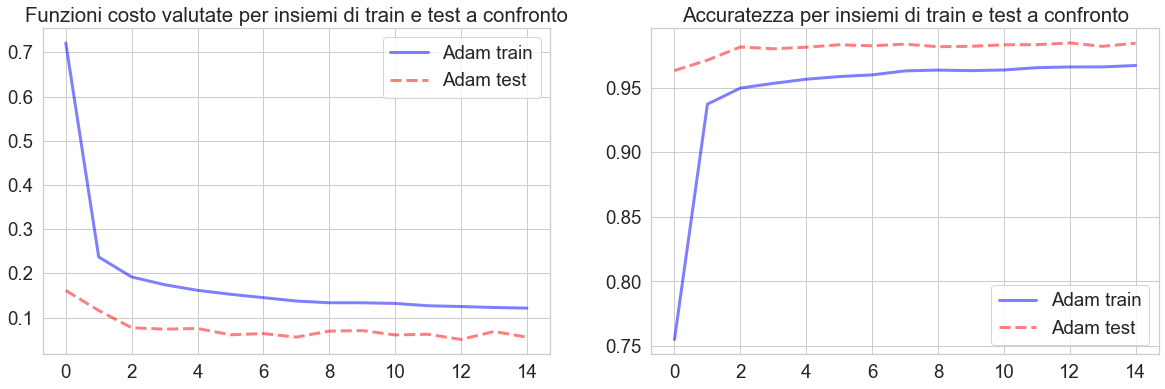

In [140]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Funzioni costo valutate per insiemi di train e test a confronto')
plt.plot(hist_L, color='blue', alpha=0.5, linewidth=3, linestyle='-', label='Adam train')
plt.plot(hist_VL, color='red', alpha=0.5, linewidth=3, linestyle='--', label='Adam test')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuratezza per insiemi di train e test a confronto')
plt.plot(hist_A, color='blue', alpha=0.5, linewidth=3, linestyle='-', label='Adam train')
plt.plot(hist_VA, color='red', alpha=0.5, linewidth=3, linestyle='--', label='Adam test')
plt.legend()

plt.show()

### Vediamo come lavora la DCNN

In [146]:
from PIL import Image
import os

plt.figure(figsize=(20, 3))  

for k in range(10):
    digit_filename = 'Results/'+str(k)+'.png'
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255


    data = data.reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit\npredicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Results/0.png'

<Figure size 1440x216 with 0 Axes>